In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.82 MiB | 32.78 MiB/s, done.
Resolving deltas: 100% (568/568), done.


In [0]:
!python setup.py install

In [0]:
!unzip annots_testApple.zip
!unzip annots_testBanana.zip
!unzip annots_testOrange.zip
!unzip images_testApple.zip
!unzip images_testBanana.zip
!unzip images_testOrange.zip

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip install q keras==2.2.5.

In [3]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
%matplotlib inline
from os import listdir
from xml.etree import ElementTree

Using TensorFlow backend.


In [0]:
class AppleDataset(Dataset):
  def load_dataset(self, dataset_dir, is_train):
    self.add_class("dataset", 1, "Apple")
    if is_train == True:
      images_dir = dataset_dir + 'images' + 'Apple'
      annotations_dir = dataset_dir + 'annots' + 'Apple'
    else:
      images_dir = dataset_dir + 'images_test' + 'Apple'
      annotations_dir = dataset_dir + 'annots_test' + 'Apple'
    for filename in listdir(images_dir):
      image_id = filename[:-4]
      img_path = images_dir + '/' + filename
      ann_path = annotations_dir + '/' + image_id + '.xml'
      self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
  def extract_boxes(self, filename):
    tree = ElementTree.parse(filename)
    root = tree.getroot()
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype='uint8')
    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('Apple'))
    return masks, asarray(class_ids, dtype='int32')
  def image_reference(self, image_id):
    info = self.image_info[image_id]
    print(info)
    return info['path']

In [0]:
class BananaDataset(Dataset):
  def load_dataset(self, dataset_dir, is_train):
    self.add_class("dataset", 1, "Banana")
    if is_train == True:
      images_dir = dataset_dir + 'images' + 'Banana'
      annotations_dir = dataset_dir + 'annots' + 'Banana'
    else:
      images_dir = dataset_dir + 'images_test' + 'Banana'
      annotations_dir = dataset_dir + 'annots_test' + 'Banana'
    for filename in listdir(images_dir):
      image_id = filename[:-4]
      img_path = images_dir + '/' + filename
      ann_path = annotations_dir + '/' + image_id + '.xml'
      self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
  def extract_boxes(self, filename):
    tree = ElementTree.parse(filename)
    root = tree.getroot()
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype='uint8')
    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('Banana'))
    return masks, asarray(class_ids, dtype='int32')
  def image_reference(self, image_id):
    info = self.image_info[image_id]
    print(info)
    return info['path']

In [0]:
class OrangeDataset(Dataset):
  def load_dataset(self, dataset_dir, is_train):
    self.add_class("dataset", 1, "Orange")
    if is_train == True:
      images_dir = dataset_dir + 'images' + 'Orange'
      annotations_dir = dataset_dir + 'annots' + 'Orange'
    else:
      images_dir = dataset_dir + 'images_test' + 'Orange'
      annotations_dir = dataset_dir + 'annots_test' + 'Orange'
    for filename in listdir(images_dir):
      image_id = filename[:-4]
      img_path = images_dir + '/' + filename
      ann_path = annotations_dir + '/' + image_id + '.xml'
      self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
  def extract_boxes(self, filename):
    tree = ElementTree.parse(filename)
    root = tree.getroot()
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype='uint8')
    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('Orange'))
    return masks, asarray(class_ids, dtype='int32')
  def image_reference(self, image_id):
    info = self.image_info[image_id]
    print(info)
    return info['path']

In [7]:
test_set_Apple = AppleDataset()
test_set_Apple.load_dataset('', is_train=False)
test_set_Apple.prepare()
print('Test: %d' % len(test_set_Apple.image_ids))

Test: 144


In [8]:
test_set_Banana = BananaDataset()
test_set_Banana.load_dataset('', is_train=False)
test_set_Banana.prepare()
print('Test: %d' % len(test_set_Banana.image_ids))

Test: 68


In [9]:
test_set_Orange = OrangeDataset()
test_set_Orange.load_dataset('', is_train=False)
test_set_Orange.prepare()
print('Test: %d' % len(test_set_Orange.image_ids))

Test: 208


In [0]:
class AppleConfig(Config):
    # give the configuration a recognizable name
    NAME = "Apple"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    IMAGES_PER_GPU = 1
 
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 1078
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    MAX_GT_INSTANCES=10
    

In [0]:
class BananaConfig(Config):
    # give the configuration a recognizable name
    NAME = "Banana"

    IMAGES_PER_GPU = 1
 
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 723
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

In [0]:
class OrangeConfig(Config):
    # give the configuration a recognizable name
    NAME = "Orange"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    IMAGES_PER_GPU = 1
 
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 900
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

In [0]:
from mrcnn import utils
def compute_batch_ap(dataset, image_ids, verbose=1):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect_molded(image[np.newaxis], image_meta[np.newaxis], verbose=0)
        # Compute AP over range 0.5 to 0.95
        r = results[0]
        ap = utils.compute_ap_range(
            gt_bbox, gt_class_id, gt_mask,
            r['rois'], r['class_ids'], r['scores'], r['masks'],
            verbose=0)
        APs.append(ap)
        if verbose:
            info = dataset.image_info[image_id]
            meta = modellib.parse_image_meta(image_meta[np.newaxis,...])
            print("{:3} {}   AP: {:.2f}".format(
                meta["image_id"][0], meta["original_image_shape"][0], ap))
    return APs

Processing 1 images
image                    shape: (768, 1024, 3)        min:   55.00000  max:  244.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


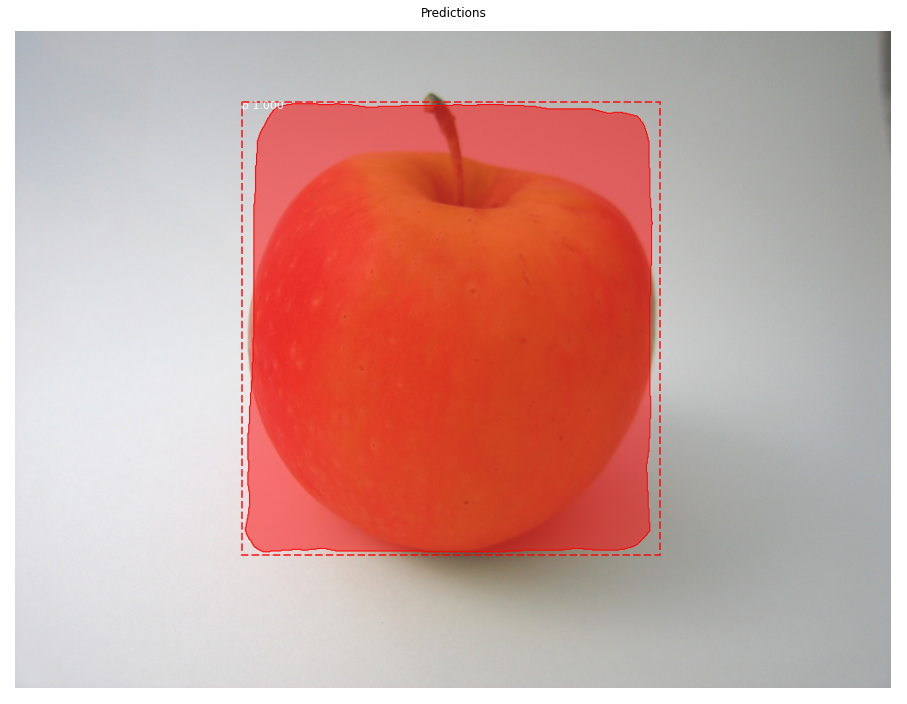

In [20]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
config = AppleConfig()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
model.load_weights('/content/drive/My Drive/Appleweight.h', by_name=True)
img = load_img("/content/images_testApple/2cb9c8efddb5e42f.jpg")
img = img_to_array(img)
result= model.detect([img], verbose=1)

r = result[0]
visualize.display_instances(img, boxes = r['rois'], masks = r['masks'], class_ids = r['class_ids'],
                            class_names = 'Apple', scores = r['scores'],
                            title="Predictions")

In [21]:
APs = compute_batch_ap(test_set_Apple, test_set_Apple.image_ids)
print("Mean AP overa {} images: {:.4f}".format(len(APs), np.mean(APs)))

  0 [1024  724    3]   AP: 0.50
  1 [ 768 1024    3]   AP: 0.15
  2 [ 686 1024    3]   AP: 0.01
  3 [3456 5184    3]   AP: 0.90
  4 [ 681 1024    3]   AP: 0.23
  5 [1024  683    3]   AP: 0.87
  6 [ 768 1024    3]   AP: 0.00
  7 [ 768 1024    3]   AP: 0.90
  8 [1024  995    3]   AP: 0.80
  9 [1024 1024    3]   AP: 0.90
 10 [ 682 1024    3]   AP: 0.90
 11 [ 683 1024    3]   AP: 0.20
 12 [ 768 1024    3]   AP: 0.90
 13 [ 683 1024    3]   AP: 0.05
 14 [ 685 1024    3]   AP: 0.10
 15 [ 806 1024    3]   AP: 0.62
 16 [1024  768    3]   AP: 0.50
 17 [ 683 1024    3]   AP: 0.68
 18 [ 680 1024    3]   AP: 0.40
 19 [ 731 1024    3]   AP: 0.40
 20 [ 765 1024    3]   AP: 0.05
 21 [ 768 1024    3]   AP: 0.90
 22 [ 721 1024    3]   AP: 0.40
 23 [ 702 1024    3]   AP: 0.20
 24 [1024  702    3]   AP: 0.38
 25 [ 767 1024    3]   AP: 0.27
 26 [1024  680    3]   AP: 0.00
 27 [ 768 1024    3]   AP: 0.90
 28 [ 984 1024    3]   AP: 0.45
 29 [ 683 1024    3]   AP: 0.90
 30 [1024 1024    3]   AP: 0.00
 31 [ 76

Processing 1 images
image                    shape: (935, 1024, 3)        min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


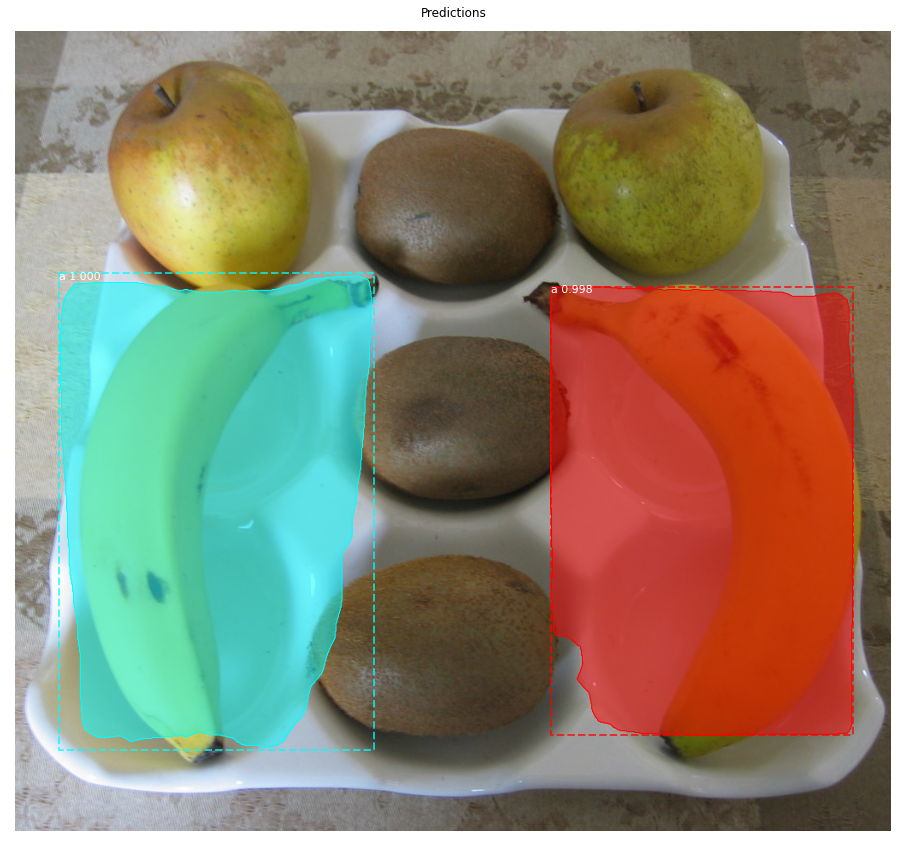

In [22]:
config = BananaConfig()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
model.load_weights('/content/drive/My Drive/Bananaweight.h', by_name=True)
img = load_img("/content/images_testBanana/c7d1b8d77ca90b86.jpg")
img = img_to_array(img)
result= model.detect([img], verbose=1)

r = result[0]
visualize.display_instances(img, boxes = r['rois'], masks = r['masks'], class_ids = r['class_ids'],
                            class_names = 'Banana', scores = r['scores'],
                            title="Predictions")

In [23]:
APs = compute_batch_ap(test_set_Banana, test_set_Banana.image_ids)
print("Mean AP overa {} images: {:.4f}".format(len(APs), np.mean(APs)))

  0 [ 970 1024    3]   AP: 0.50
  1 [ 678 1024    3]   AP: 0.60
  2 [3000 4000    3]   AP: 0.70
  3 [ 768 1024    3]   AP: 0.03
  4 [ 682 1024    3]   AP: 0.00
  5 [ 703 1024    3]   AP: 0.25
  6 [1024 1024    3]   AP: 0.60
  7 [ 768 1024    3]   AP: 0.00
  8 [1024  681    3]   AP: 0.26
  9 [ 683 1024    3]   AP: 0.00
 10 [ 678 1024    3]   AP: 0.40
 11 [ 682 1024    3]   AP: 0.60
 12 [1024  996    3]   AP: 0.62
 13 [1024 1024    3]   AP: 0.50
 14 [ 768 1024    3]   AP: 0.60
 15 [ 768 1024    3]   AP: 0.90
 16 [ 768 1024    3]   AP: 0.50
 17 [ 768 1024    3]   AP: 0.70
 18 [ 768 1024    3]   AP: 0.90
 19 [ 683 1024    3]   AP: 0.17
 20 [ 768 1024    3]   AP: 0.90
 21 [ 681 1024    3]   AP: 0.12
 22 [ 683 1024    3]   AP: 0.10
 23 [1024  768    3]   AP: 0.50
 24 [ 994 1024    3]   AP: 0.60
 25 [ 683 1024    3]   AP: 0.90
 26 [1024  764    3]   AP: 0.07
 27 [1024  879    3]   AP: 0.00
 28 [ 819 1024    3]   AP: 0.70
 29 [ 768 1024    3]   AP: 0.60
 30 [ 683 1024    3]   AP: 0.90
 31 [102

Processing 1 images
image                    shape: (764, 1024, 3)        min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


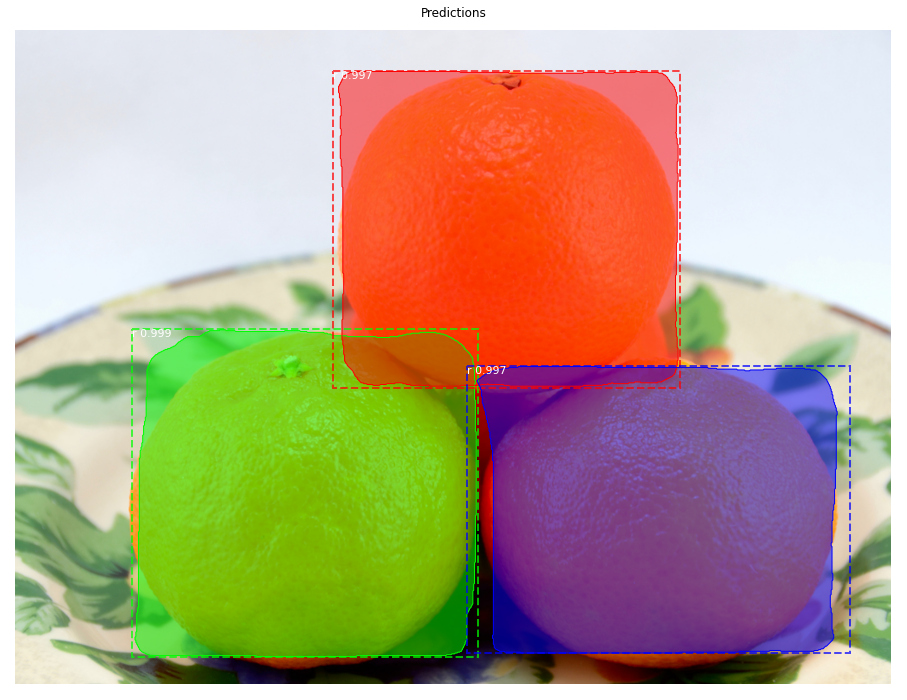

In [24]:
config = OrangeConfig()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
model.load_weights('/content/drive/My Drive/Orangeweight.h', by_name=True)
img = load_img("/content/images_testOrange/6a7745c9f562a645.jpg")
img = img_to_array(img)
result= model.detect([img], verbose=1)

r = result[0]
visualize.display_instances(img, boxes = r['rois'], masks = r['masks'], class_ids = r['class_ids'],
                            class_names = 'Orange', scores = r['scores'],
                            title="Predictions")

In [25]:
APs = compute_batch_ap(test_set_Orange, test_set_Orange.image_ids)
print("Mean AP overa {} images: {:.4f}".format(len(APs), np.mean(APs)))

  0 [ 683 1024    3]   AP: 0.14
  1 [ 768 1024    3]   AP: 0.00
  2 [ 680 1024    3]   AP: 0.00
  3 [ 667 1024    3]   AP: 0.80
  4 [ 768 1024    3]   AP: 0.20
  5 [ 768 1024    3]   AP: 0.40
  6 [1024 1024    3]   AP: 0.00
  7 [ 768 1024    3]   AP: 0.70
  8 [ 681 1024    3]   AP: 0.80
  9 [ 685 1024    3]   AP: 0.37
 10 [ 684 1024    3]   AP: 0.80
 11 [ 768 1024    3]   AP: 0.00
 12 [1024  768    3]   AP: 0.70
 13 [ 854 1024    3]   AP: 0.00
 14 [ 617 1024    3]   AP: 0.60
 15 [ 768 1024    3]   AP: 0.27
 16 [1024  683    3]   AP: 0.32
 17 [ 683 1024    3]   AP: 0.90
 18 [1024 1024    3]   AP: 0.00
 19 [1024 1024    3]   AP: 0.00
 20 [1024 1024    3]   AP: 0.70
 21 [ 682 1024    3]   AP: 0.13
 22 [ 639 1024    3]   AP: 0.00
 23 [1024  683    3]   AP: 0.00
 24 [ 768 1024    3]   AP: 0.53
 25 [ 731 1024    3]   AP: 0.21
 26 [ 768 1024    3]   AP: 0.00
 27 [1024 1024    3]   AP: 0.90
 28 [ 790 1024    3]   AP: 0.80
 29 [ 768 1024    3]   AP: 0.17
 30 [ 683 1024    3]   AP: 0.00
 31 [ 76